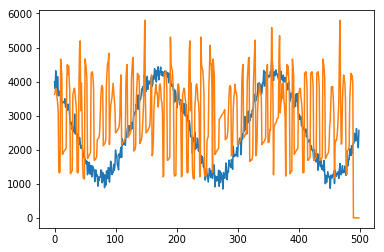

1544.88690581608


In [63]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster_scaled as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=10

##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[182]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
reco = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
plt.plot(sine)
plt.plot(reco)
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))
        
#         reco_error_ar=np.array(reco_error)
#         max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
#         f = plt.figure()
#         ax = f.add_subplot(211)
#         plt.plot(rho_valid[int(max_rho[3])])
#         plt.plot(reco)
#         plt.ylim([0,10000])
#         plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
#                  ha='right', va='top', transform=ax.transAxes)
#         min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
#         valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
#         reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)


In [75]:
np.random.randint(500)

311

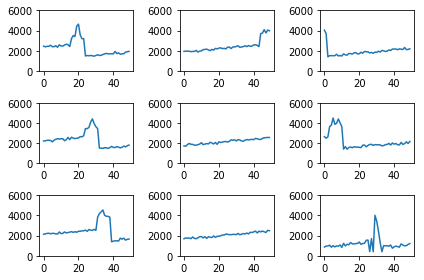

In [39]:
f = plt.figure()

for n, seg in enumerate(cluster.cluster_centers_[0:9]):
    ax = f.add_subplot(3,3,n+1)
    plt.plot(seg)
    plt.ylim(0,6000)
plt.tight_layout()
plt.show()
                              

In [11]:
interval

265.9890335025607

In [16]:
np.savetxt("synthetic_sines_wide.csv" ,sines, delimiter=',')

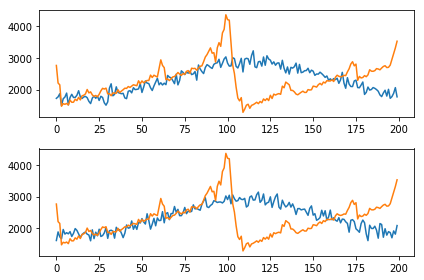

1125.68696544148


In [70]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines_range_wide.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


#reco_classes=[]
k_cluster=150
seg_len=200


##train the model
#loop throught the light curves of a given class and segments them
all_train_segments=[]
for rho in rho_train:
    train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
    all_train_segments.append(train_segments)
all_train_segments=np.vstack(all_train_segments)
#cluster the segments
cluster=KMeans(n_clusters=k_cluster, random_state=0)
cluster.fit(all_train_segments)

        #reconstruction loop through light curves for every class other than rho              
sine=sine_file[122]
valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
# for seg in valid_segments:
#     plt.plot(seg)
#     pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
#     plt.plot(cluster.cluster_centers_[pred_centroid_index])
#     plt.show()
    
    
f = plt.figure()

for n, seg in enumerate(valid_segments[0:9]):
    ax = f.add_subplot(2,1,n+1)
    plt.plot(seg)
    pred_centroid_index=cluster.predict(np.array(seg).reshape(1, -1))[0]
    plt.plot(cluster.cluster_centers_[pred_centroid_index])
plt.tight_layout()
plt.show()
print(np.sqrt(np.mean((reco-sine)**2)))

(array([ 5., 12., 25., 33., 47., 48., 41., 26., 10.,  3.]),
 array([162.8435388 , 170.38372216, 177.92390552, 185.46408889,
        193.00427225, 200.54445561, 208.08463898, 215.62482234,
        223.16500571, 230.70518907, 238.24537243]),
 <a list of 10 Patch objects>)

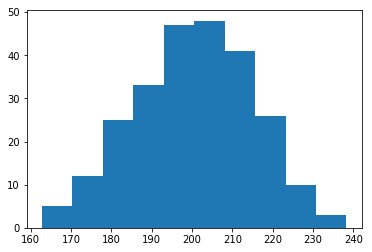

In [14]:
plt.hist(np.random.normal(200, 15,250))

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split


#synthesise sine waves that span the same range as the synthetic rho

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
list_mins=np.min(rho_train, axis=1)
list_maxs=np.max(rho_train, axis=1)

small_maxs=list_maxs[np.where(list_maxs<5000)[0]]

#"outlier" lightcurves
no_sines=250
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(200, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    range_ind=np.random.randint(len(small_maxs))
    ys+=1
    ys=(ys/2)*(small_maxs[range_ind]-list_mins[range_ind])
    ys+=np.random.normal(0,200 ,len(ys))
    if np.min(ys)<0:
        ys+=abs(np.min(ys))
    ys*=(small_maxs[range_ind]-list_mins[range_ind])/np.max(ys)
    ys+=list_mins[range_ind]
    sines[sine,:]=ys

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


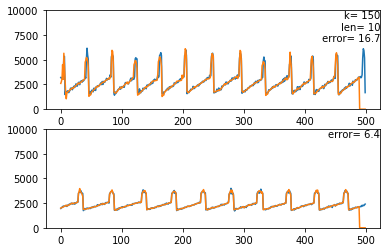

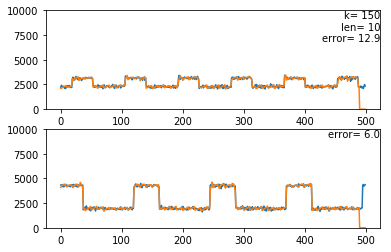

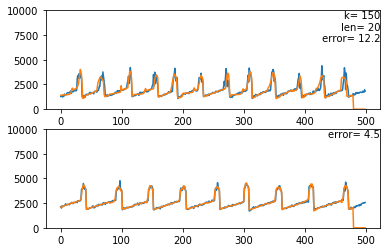

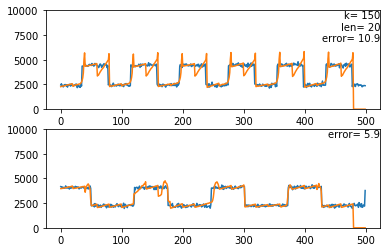

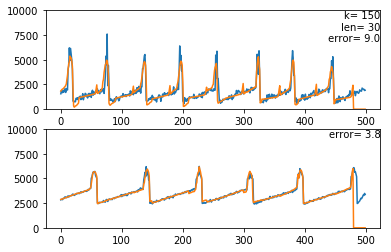

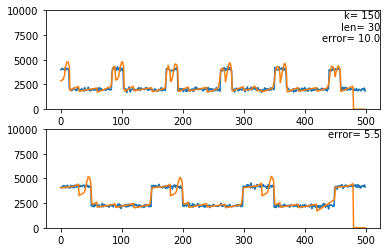

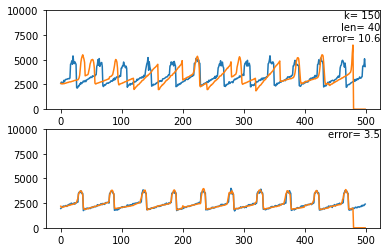

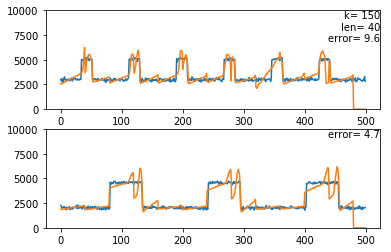

KeyboardInterrupt: 

In [65]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_boxes_thick.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

In [43]:
cluster.cluster_centers_

array([[-0.32088766, -0.75287301, -0.77480473, ..., -0.6688567 ,
        -0.61315525, -0.57397877],
       [-0.02033185, -0.14596199, -0.22815534, ...,  1.41558705,
         1.19015077,  0.94664162],
       [-0.52632864, -0.50320547, -0.48797864, ..., -0.49523709,
        -0.52606248, -0.56468793],
       ...,
       [-0.75664405, -0.74245402, -0.74717765, ..., -0.0069282 ,
         0.03147085,  0.11563842],
       [ 0.12761144,  0.12964913,  0.2332621 , ..., -0.19215961,
        -0.30572746, -0.32473814],
       [ 0.52802533,  0.56137799,  0.80193036, ...,  0.0787771 ,
         0.1051422 ,  0.13740996]])

In [44]:
std_ori=np.std(np.array(lc))
mean_ori=np.mean(np.array(lc))
scaled_centroids=np.copy(cluster.cluster_centers_)
scaled_centroids=mean_ori+(scaled_centroids-np.mean(scaled_centroids))*(std_ori/np.std(scaled_centroids))
scaled_centroids

array([[2499.80432798, 1907.30548951, 1877.2245685 , ..., 2022.53987379,
        2098.93839466, 2152.6717477 ],
       [2912.03813634, 2739.72739788, 2626.99333334, ..., 4881.50370253,
        4572.30170066, 4238.31147619],
       [2218.02731761, 2249.74239143, 2270.62708763, ..., 2260.67160322,
        2218.39237239, 2165.41479643],
       ...,
       [1902.13323689, 1921.59587608, 1915.11707914, ..., 2930.42220174,
        2983.0892393 , 3098.53109192],
       [3114.95294596, 3117.74778807, 3259.86039029, ..., 2676.36406152,
        2520.59761658, 2494.52311938],
       [3664.14926246, 3709.8948243 , 4039.82962472, ..., 3047.97315598,
        3084.1347741 , 3128.39232268]])

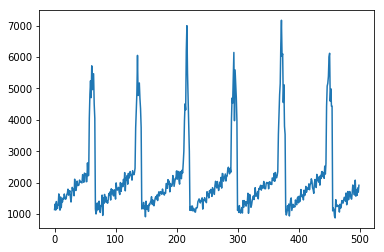

In [124]:
[241,  35,]
lc=rho_valid[241]
#plot_reco(lc)
plt.plot(rho_valid[241])

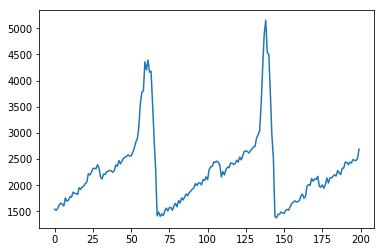

In [92]:
cluster.predict(rho_valid[241][0:200].reshape(1, -1))
plt.plot(cluster.cluster_centers_[48])

In [111]:
test_cluster=np.copy(cluster.cluster_centers_)

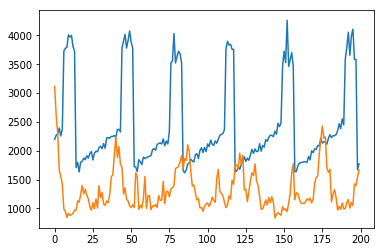

In [125]:
# std_segment=rho_valid[243][0:200]
# mean_segment=rho_valid[243][0:200]
# cluster.cluster_centers_=mean_segment+(cluster.cluster_centers_-np.mean(cluster.cluster_centers_))*(std_segment/np.std(cluster.cluster_centers_))
# cluster.predict(rho_valid[243][0:200].reshape(1, -1)) #94
plt.plot(rho_valid[243][0:200])
plt.plot(cluster.cluster_centers_[94])